In [94]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

### Grouping by domain/sector

In [95]:
domain_df = pd.read_csv('../input/clear_domain.csv', index_col=0)
domain_df.head()

Symbol             GICS Sector
0    MMM             Industrials
1    AOS             Industrials
2    ABT             Health Care
4    ACN  Information Technology
5   ADBE  Information Technology

In [96]:
domain_df.set_index('Symbol', inplace=True)
domain_df

GICS Sector
Symbol                        
MMM                Industrials
AOS                Industrials
ABT                Health Care
ACN     Information Technology
ADBE    Information Technology
...                        ...
WYNN    Consumer Discretionary
XEL                  Utilities
YUM     Consumer Discretionary
ZBRA    Information Technology
ZBH                Health Care

[428 rows x 1 columns]

In [97]:
adj_stocks = np.array([
    [domain_df.loc[stock1, 'GICS Sector'] == domain_df.loc[stock2, 'GICS Sector'] * (stock1 != stock2) for stock1 in domain_df.index]
    for stock2 in domain_df.index
]).astype(int)

adj_stocks

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

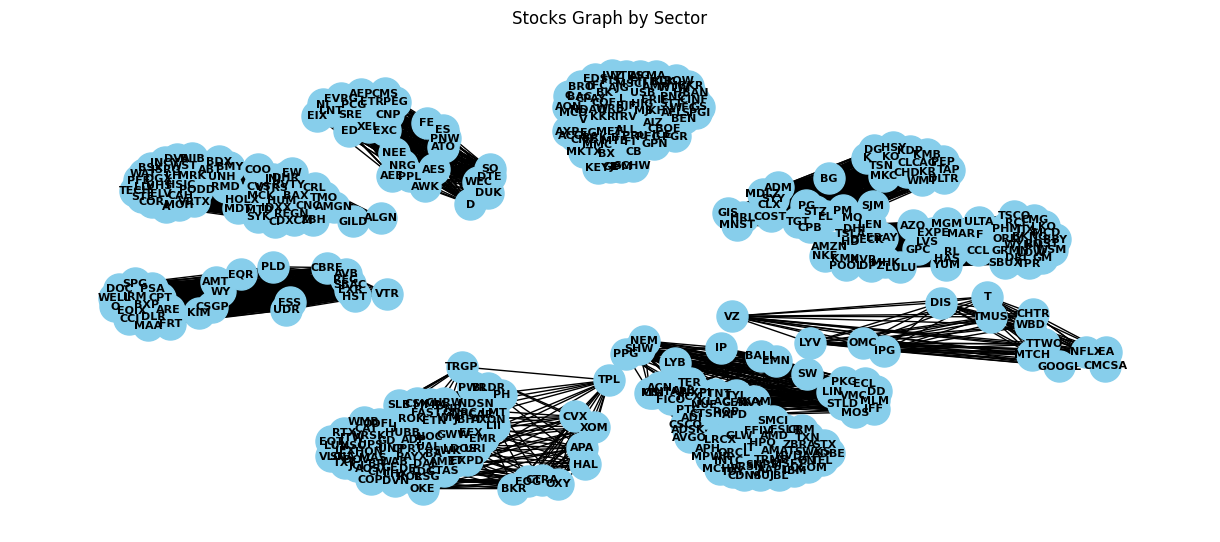

In [98]:
stocks_graph = nx.from_numpy_array(adj_stocks)
stocks_graph = nx.relabel_nodes(stocks_graph, dict(enumerate(domain_df.index)))

plt.figure(figsize=(12, 5))
nx.draw(stocks_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(stocks_graph, k=.5))
plt.title('Stocks Graph by Sector')
plt.show()

### Grouping by fundamentals correlation

In [99]:
fundamentals_df = pd.read_csv('../input/clear_fundamentals.csv', index_col=0)
fundamentals_df.head()

Symbol  forwardPE  priceToBook  enterpriseToRevenue  profitMargins  \
0    MMM  19.240505    18.872610                3.682        0.16011   
1    AOS  17.393120     5.373871                5.275        0.13683   
2    ABT  25.616278     4.549616                5.486        0.32427   
4    ACN  18.063255     5.179863                2.305        0.11607   
5   ADBE  16.958637    12.998881                6.579        0.30392   

   trailingEps  forwardEps   beta  52WeekChange  averageVolume     marketCap  \
0         7.20        7.90  1.104      0.156773      3375564.0  8.095977e+10   
1         3.59        4.07  1.220     -0.090804      1403941.0  9.919802e+09   
2         7.97        5.16  0.705      0.168700      6356111.0  2.300540e+11   
4        12.58       14.07  1.290     -0.254539      3973364.0  1.582981e+11   
5        15.61       20.55  1.517     -0.386368      3889275.0  1.478337e+11   

   payoutRatio  
0       0.3972  
1       0.3733  
2       0.2861  
4       0.4558  
5       0.0000

In [100]:
fundamentals_df.set_index('Symbol', inplace=True)

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
fundamentals_std = sc.fit_transform(fundamentals_df)
fundamentals_std_df = pd.DataFrame(fundamentals_std, columns=fundamentals_df.columns,
                                   index=fundamentals_df.index)
fundamentals_std_df

forwardPE  priceToBook  enterpriseToRevenue  profitMargins  \
Symbol                                                               
MMM     -0.146973     0.771509            -0.306913       0.141177   
AOS     -0.201723     0.054433             0.067664      -0.033753   
ABT      0.041984     0.010647             0.117279       1.374706   
ACN     -0.181863     0.044127            -0.630701      -0.189747   
ADBE    -0.214600     0.459487             0.374286       1.221792   
...           ...          ...                  ...            ...   
WYNN     0.023838    -1.785672            -0.419075      -0.648113   
XEL     -0.156732    -0.122515             0.086711       0.054163   
YUM     -0.012595    -0.508989             0.366292       0.299727   
ZBRA    -0.152345    -0.002788            -0.400969      -0.268496   
ZBH     -0.355217    -0.142872            -0.332779      -0.272028   

        trailingEps  forwardEps      beta  52WeekChange  averageVolume  \
Symbol                                                                   
MMM       -0.070542   -0.131652  0.344283      0.243319      -0.191675   
AOS       -0.211768   -0.263704  0.634206     -0.605896      -0.340056   
ABT       -0.040420   -0.226122 -0.652951      0.284229       0.032636   
ACN        0.139927    0.081080  0.809159     -1.167523      -0.146685   
ADBE       0.258462    0.304499  1.376507     -1.619710      -0.153014   
...             ...         ...       ...           ...            ...   
WYNN      -0.219983   -0.230949  1.101581      1.858278      -0.291258   
XEL       -0.210986   -0.271978 -1.545212      0.190411      -0.202105   
YUM       -0.153869   -0.194402 -0.595466     -0.038128      -0.299131   
ZBRA       0.061685    0.149002  1.963851     -0.537634      -0.406743   
ZBH       -0.191816   -0.107517 -0.725431     -0.275714      -0.312954   

        marketCap  payoutRatio  
Symbol                          
MMM     -0.106144    -0.076979  
AOS     -0.291696    -0.079480  
ABT      0.283280    -0.088607  
ACN      0.095858    -0.070845  
ADBE     0.068526    -0.118553  
...           ...          ...  
WYNN    -0.283517    -0.087582  
XEL     -0.205719    -0.053753  
YUM     -0.212821    -0.061572  
ZBRA    -0.277006    -0.118553  
ZBH     -0.263257    -0.094050  

[428 rows x 11 columns]

In [102]:
fundamentals_corr = fundamentals_std_df.transpose().corr(method='spearman')
fundamentals_corr = (fundamentals_corr - (fundamentals_corr == 1)) # Remove self-correlation
fundamentals_corr.head(n=10)

Symbol       MMM       AOS       ABT       ACN      ADBE       AMD       AES  \
Symbol                                                                         
MMM     0.000000  0.236364 -0.118182  0.281818  0.372727 -0.281818 -0.045455   
AOS     0.236364  0.000000 -0.290909  0.163636  0.781818 -0.036364  0.336364   
ABT    -0.118182 -0.290909  0.000000 -0.709091 -0.263636 -0.018182 -0.527273   
ACN     0.281818  0.163636 -0.709091  0.000000  0.390909 -0.036364  0.427273   
ADBE    0.372727  0.781818 -0.263636  0.390909  0.000000 -0.163636  0.309091   
AMD    -0.281818 -0.036364 -0.018182 -0.036364 -0.163636  0.000000  0.509091   
AES    -0.045455  0.336364 -0.527273  0.427273  0.309091  0.509091  0.000000   
AFL     0.100000  0.227273  0.000000  0.109091  0.390909 -0.672727  0.081818   
A       0.245455  0.963636 -0.172727  0.118182  0.790909 -0.127273  0.190909   
APD    -0.036364  0.227273 -0.063636 -0.281818  0.145455 -0.409091 -0.236364   

Symbol       AFL         A       APD  ...       WST        WY       WSM  \
Symbol                                ...                                 
MMM     0.100000  0.245455 -0.036364  ... -0.054545  0.000000  0.900000   
AOS     0.227273  0.963636  0.227273  ...  0.827273  0.300000  0.136364   
ABT     0.000000 -0.172727 -0.063636  ... -0.100000 -0.609091 -0.027273   
ACN     0.109091  0.118182 -0.281818  ...  0.000000  0.518182  0.063636   
ADBE    0.390909  0.790909  0.145455  ...  0.490909  0.009091  0.154545   
AMD    -0.672727 -0.127273 -0.409091  ... -0.090909  0.354545 -0.263636   
AES     0.081818  0.190909 -0.236364  ... -0.018182  0.581818 -0.309091   
AFL     0.000000  0.236364  0.354545  ...  0.036364 -0.154545 -0.181818   
A       0.236364  0.000000  0.100000  ...  0.872727  0.254545  0.200000   
APD     0.354545  0.100000  0.000000  ...  0.118182 -0.481818 -0.090909   

Symbol       WMB       WTW      WYNN       XEL       YUM      ZBRA       ZBH  
Symbol                                                                        
MMM    -0.281818  0.009091  0.127273 -0.027273 -0.400000  0.372727  0.181818  
AOS    -0.100000 -0.363636 -0.254545 -0.018182  0.018182  0.490909 -0.209091  
ABT     0.781818 -0.254545 -0.263636  0.700000  0.590909 -0.809091 -0.218182  
ACN    -0.945455 -0.027273  0.100000 -0.900000 -0.745455  0.772727  0.218182  
ADBE   -0.300000 -0.463636 -0.463636 -0.272727 -0.227273  0.563636 -0.018182  
AMD     0.145455 -0.272727  0.154545 -0.072727 -0.336364 -0.372727 -0.645455  
AES    -0.272727 -0.272727 -0.245455 -0.327273 -0.609091  0.190909 -0.009091  
AFL    -0.100000  0.118182 -0.645455  0.081818  0.090909  0.245455  0.745455  
A      -0.072727 -0.481818 -0.245455 -0.027273  0.100000  0.472727 -0.290909  
APD     0.200000  0.554545 -0.236364  0.400000  0.400000  0.100000  0.490909  

[10 rows x 428 columns]

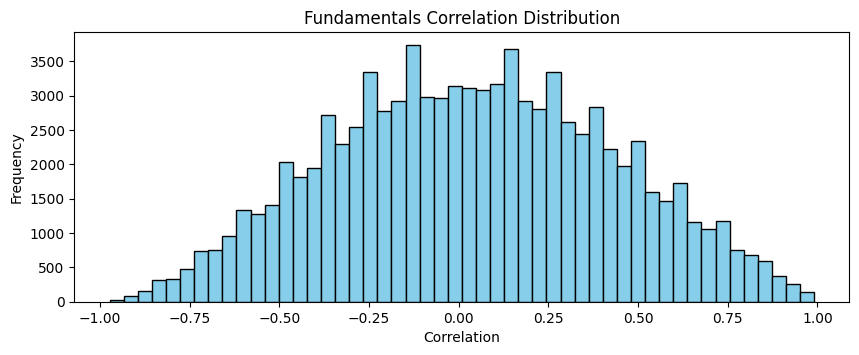

In [103]:
plt.figure(figsize=(10, 3.5))

corr_values = fundamentals_corr.values[np.triu(fundamentals_corr.values, 1).astype(bool)]

plt.hist(corr_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Fundamentals Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

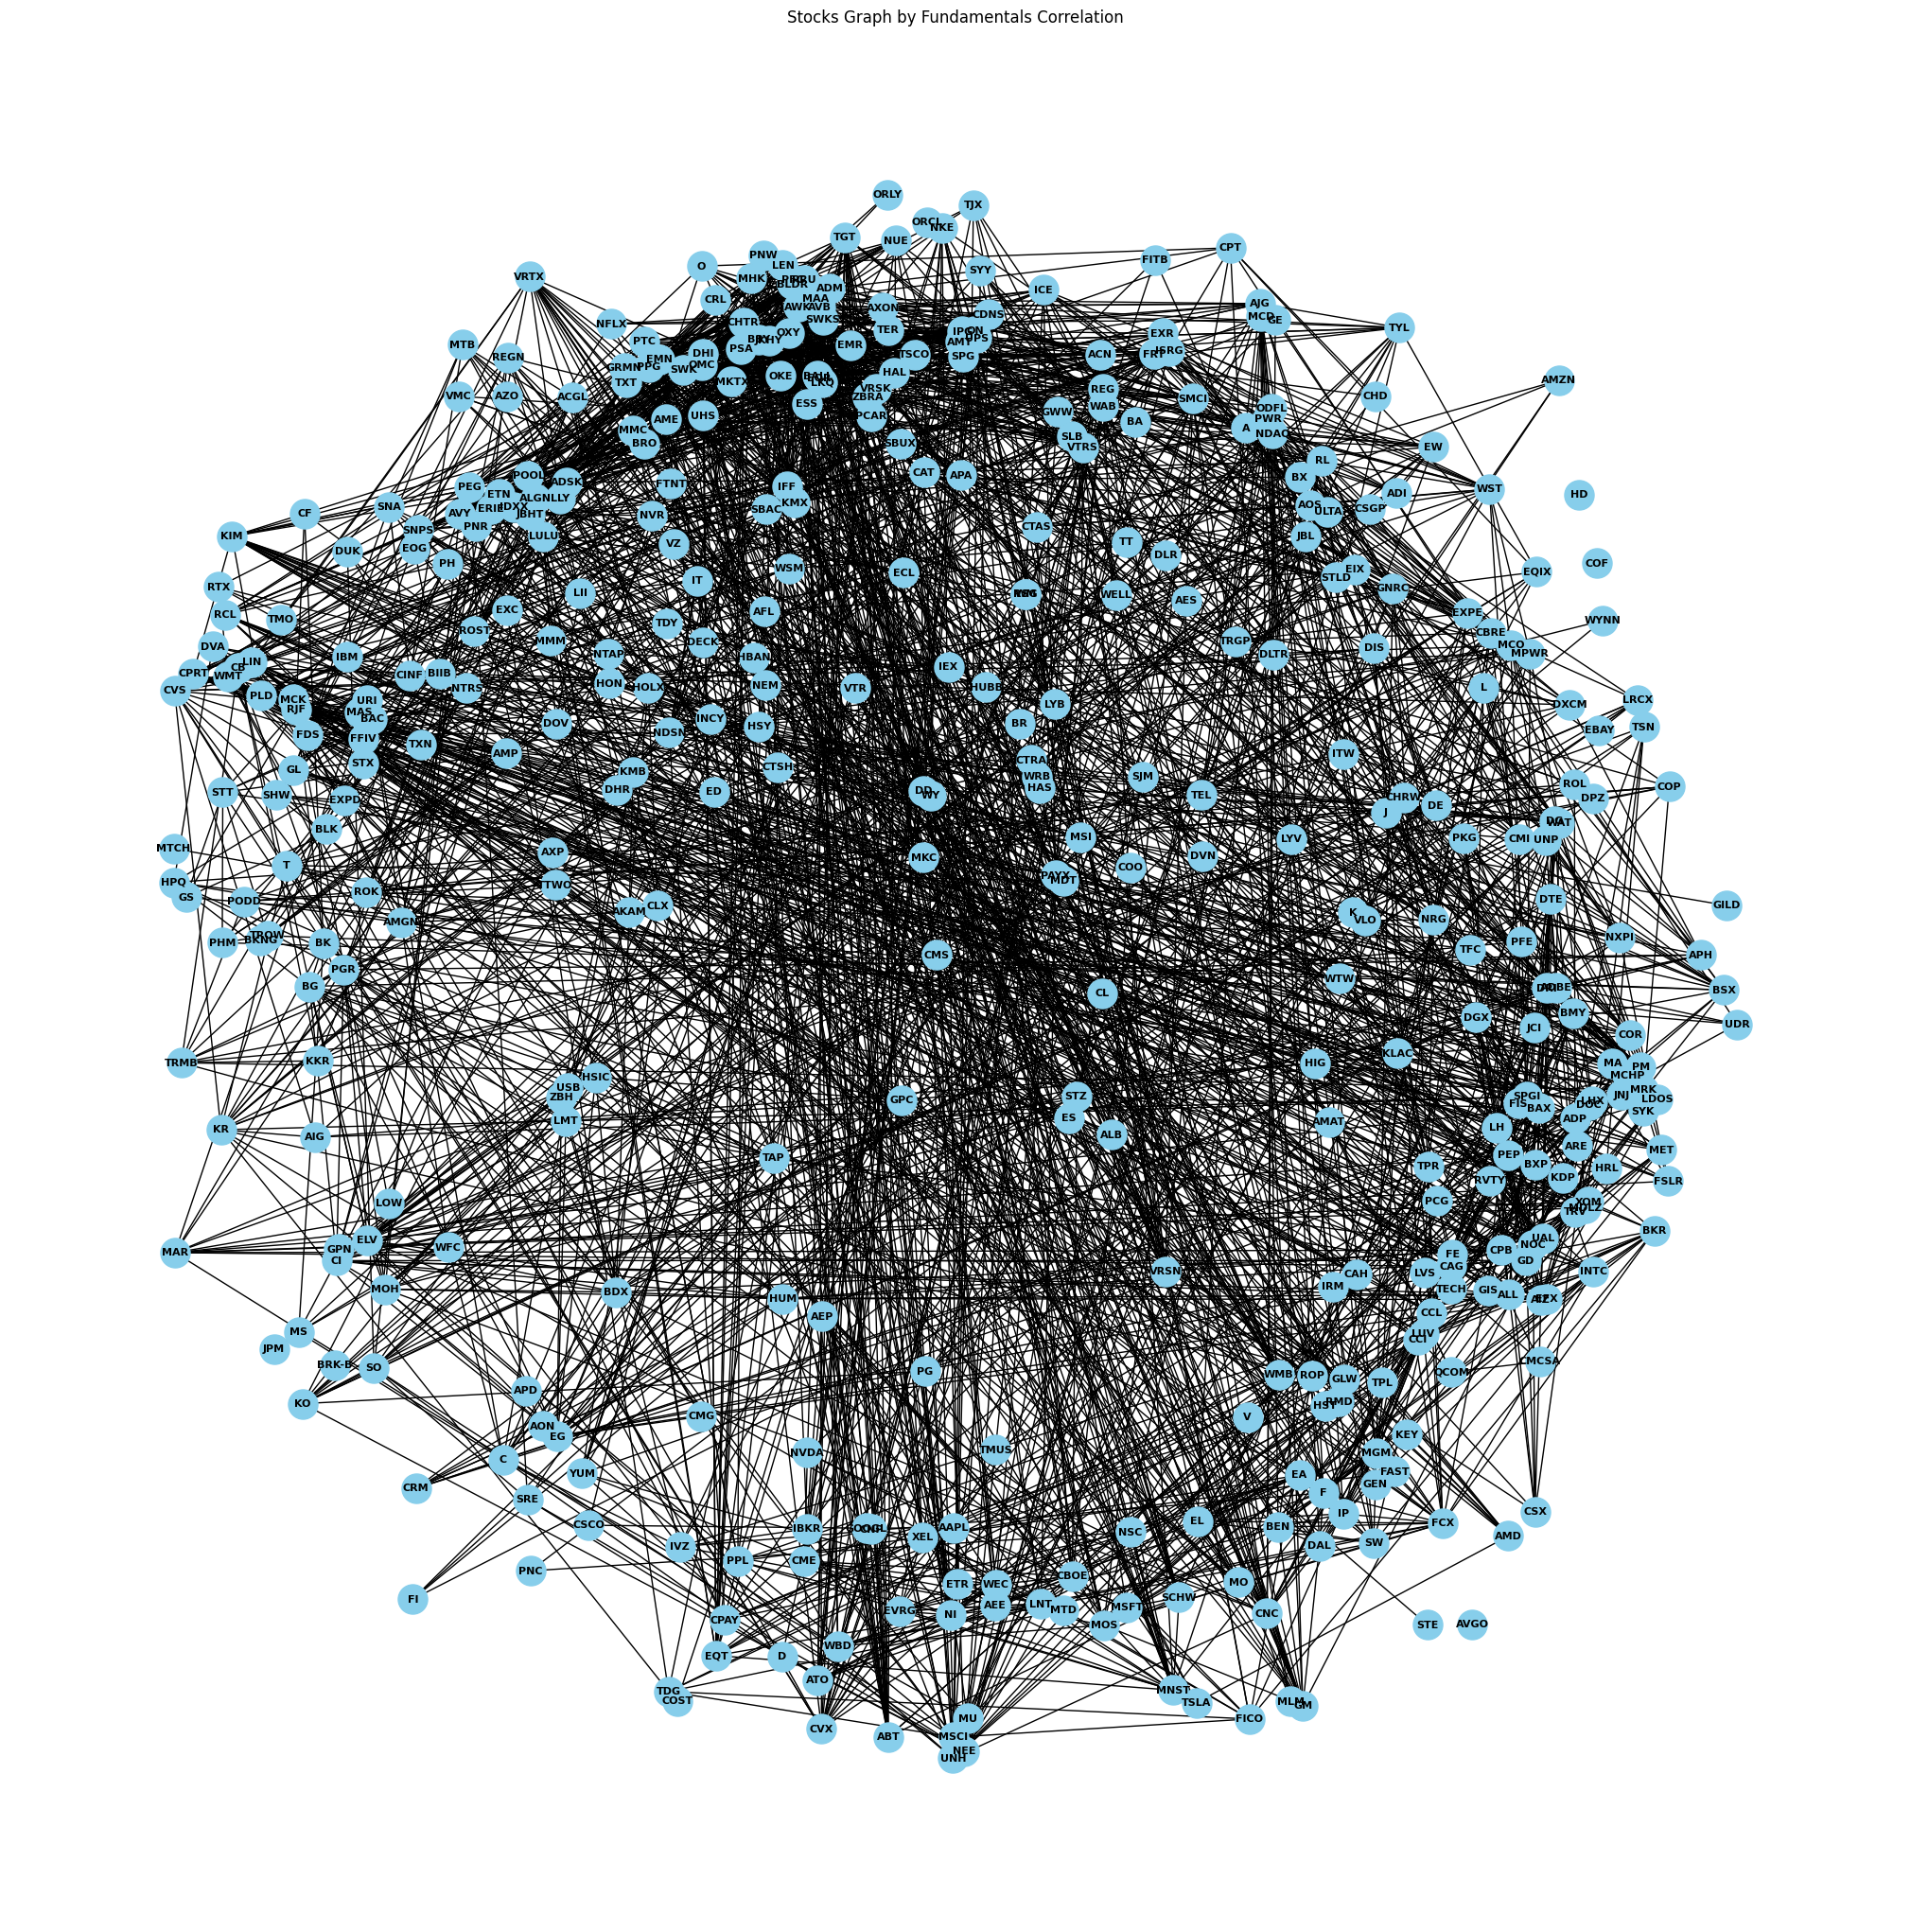

In [125]:
fundamentals_corr_np = fundamentals_corr.to_numpy()
adj_fundamentals_corr = (fundamentals_corr_np * (abs(fundamentals_corr_np) > 0.8).astype(int))

fundamentals_corr_graph = nx.from_numpy_array(adj_fundamentals_corr)
fundamentals_corr_graph = nx.relabel_nodes(fundamentals_corr_graph, dict(enumerate(fundamentals_corr.index)))

plt.figure(figsize=(20, 20))
nx.draw(fundamentals_corr_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(fundamentals_corr_graph))
plt.title('Stocks Graph by Fundamentals Correlation')
plt.show()

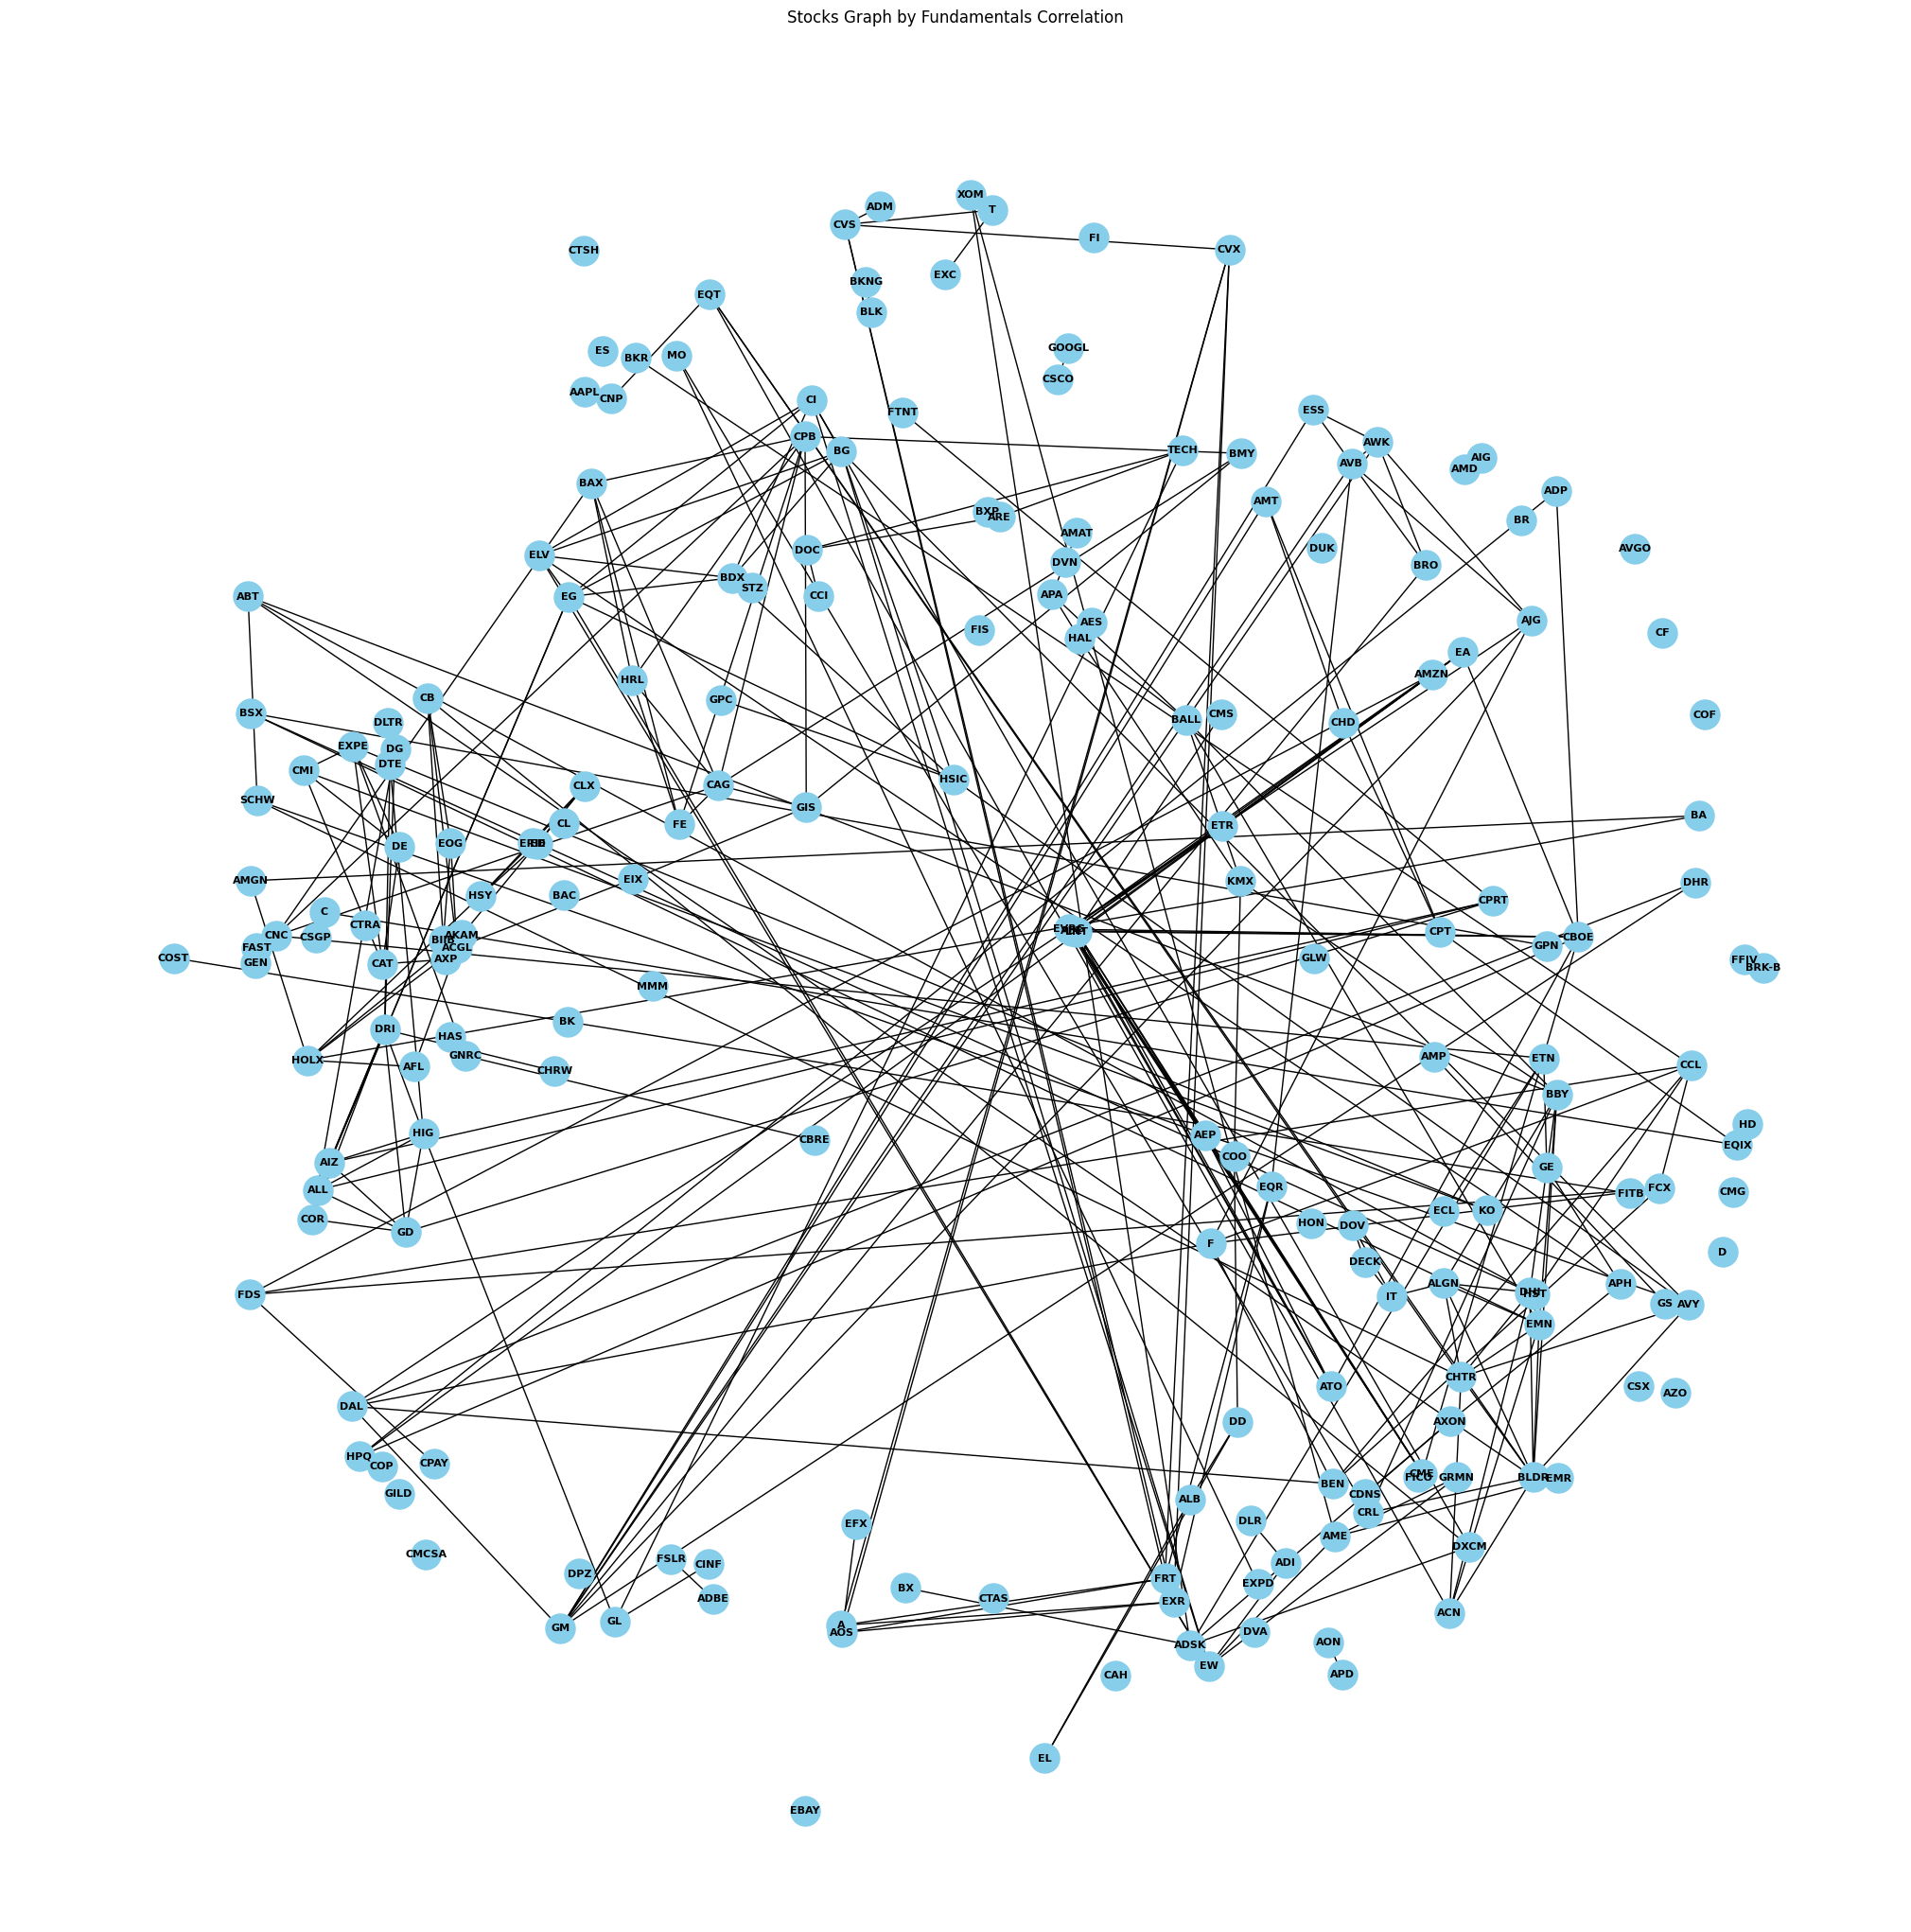

In [106]:
filtered_fundamentals_corr_np = fundamentals_corr.to_numpy()[:200, :200]
filtered_adj_fundamentals_corr = (fundamentals_corr_np[:200, :200] * (abs(fundamentals_corr_np[:200, :200]) > 0.85).astype(int))

filtered_fundamentals_corr_graph = nx.from_numpy_array(filtered_adj_fundamentals_corr)
filtered_fundamentals_corr_graph = nx.relabel_nodes(filtered_fundamentals_corr_graph, dict(enumerate(fundamentals_corr.index)))

plt.figure(figsize=(20, 20))
nx.draw(filtered_fundamentals_corr_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(fundamentals_corr_graph))
plt.title('Stocks Graph by Fundamentals Correlation')
plt.show()

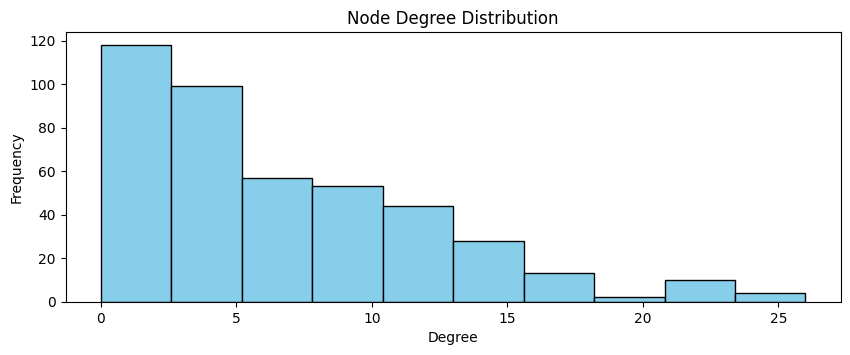

In [108]:
plt.figure(figsize=(10, 3.5))

connection_num = np.sum((np.abs(adj_fundamentals_corr) > 0).astype(int), 1)

plt.hist(connection_num, bins=10, color='skyblue', edgecolor='black')
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

### Merging the graphs

In [121]:
corr_threshold, sector_bonus = .85, .05

In [122]:
combined_adj = np.abs(adj_fundamentals_corr.copy())
combined_adj += sector_bonus * adj_stocks

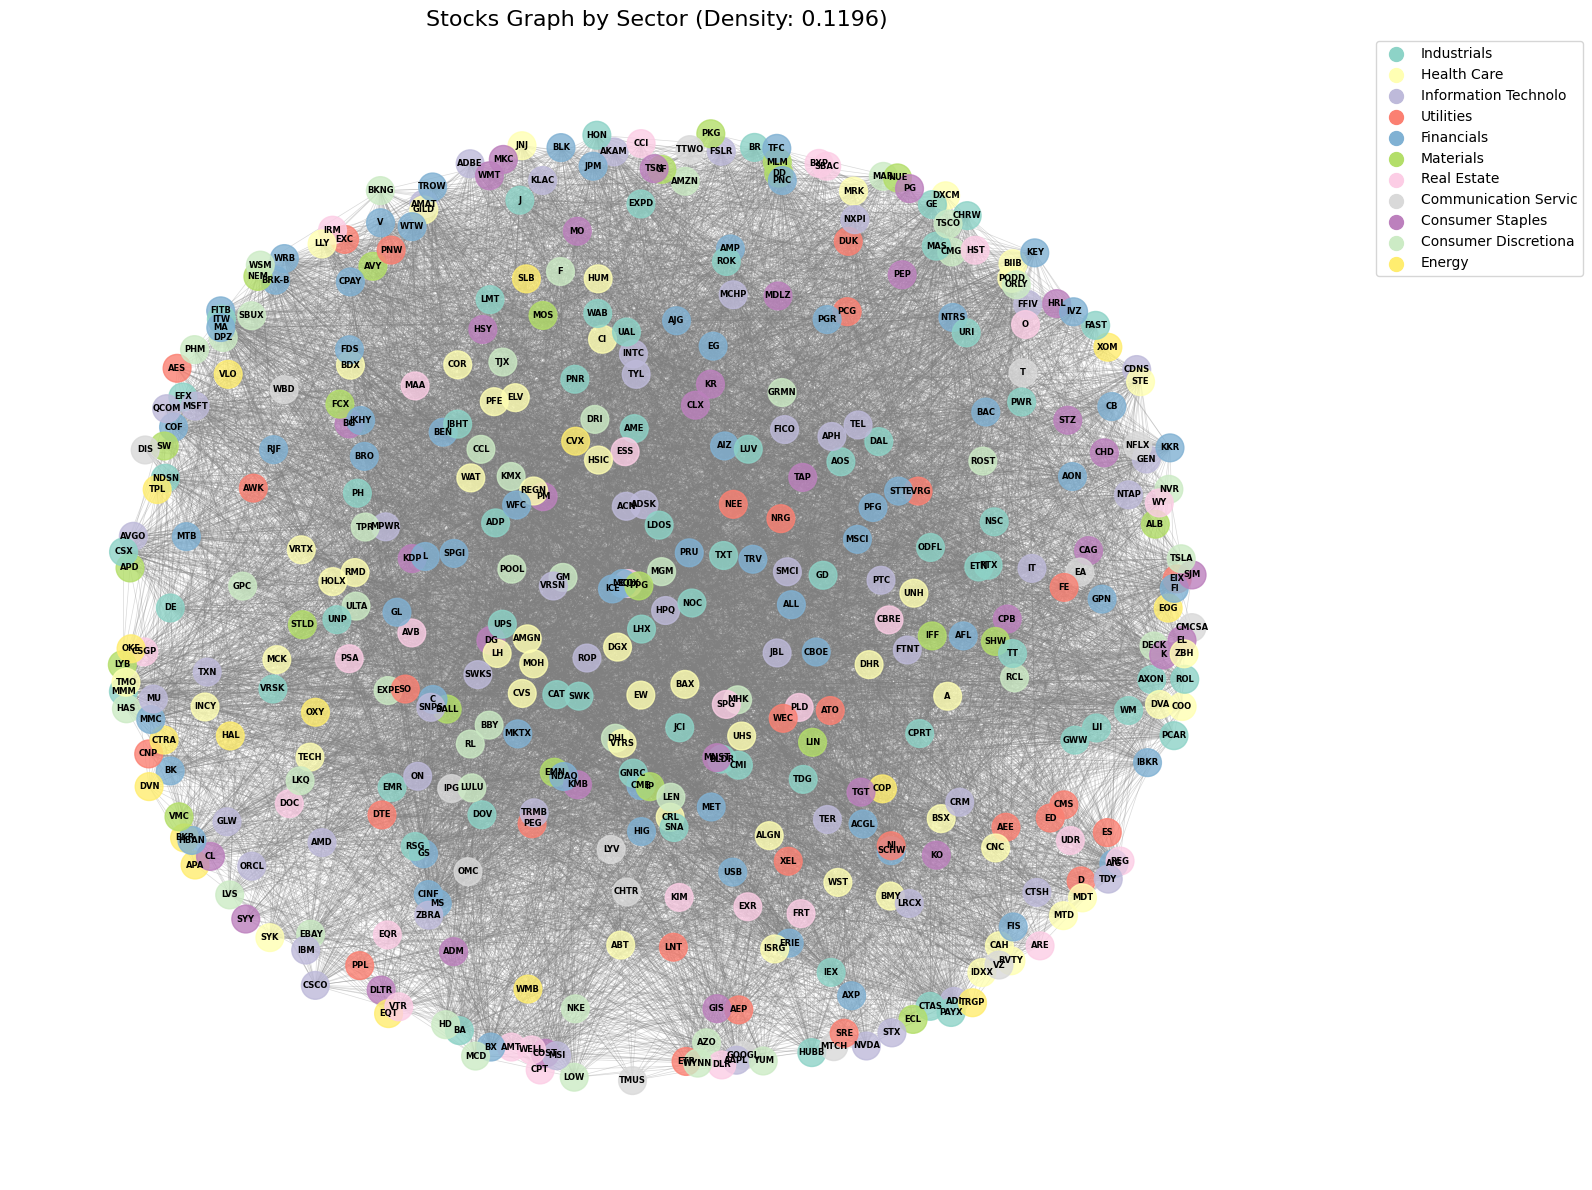

In [134]:
final_graph = nx.from_numpy_array(combined_adj)
final_graph = nx.relabel_nodes(final_graph, dict(enumerate(domain_df.index)))

# Tạo màu sắc cho từng sector
sectors = domain_df['GICS Sector'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(sectors)))
sector_color_map = dict(zip(sectors, colors))

# Gán màu cho từng node
node_colors = [sector_color_map[domain_df.loc[node, 'GICS Sector']] 
               for node in final_graph.nodes()]

# Tạo layout
pos = nx.spring_layout(final_graph, k=1.5, iterations=100)

# Vẽ đồ thị
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(final_graph, pos, 
                      node_color=node_colors, 
                      node_size=400, 
                      alpha=0.8)

nx.draw_networkx_edges(final_graph, pos, 
                      edge_color='gray', 
                      alpha=0.3, 
                      width=0.5)

nx.draw_networkx_labels(final_graph, pos, 
                       font_size=6, 
                       font_weight='bold')

# Thêm legend
for sector, color in sector_color_map.items():
    plt.scatter([], [], c=[color], label=sector[:20], s=100)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.title(f'Stocks Graph by Sector (Density: {nx.density(final_graph):.4f})', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

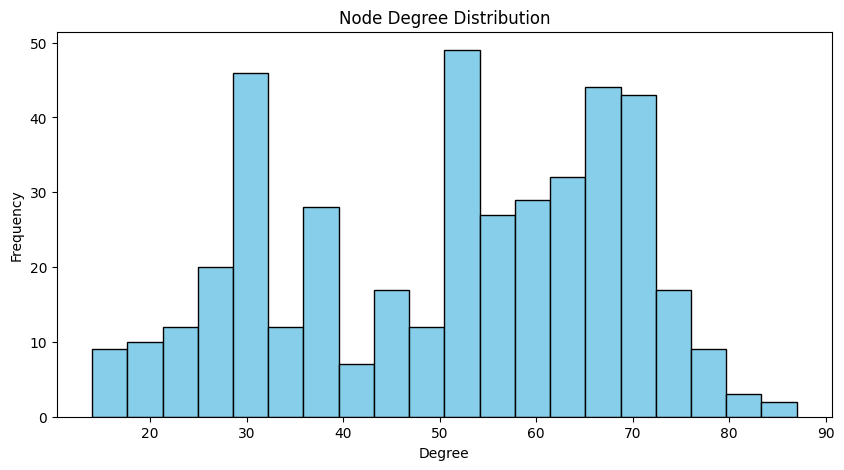

In [131]:
plt.figure(figsize=(10, 5))

connection_num = np.sum((np.abs(combined_adj) > 0).astype(int), 1)

plt.hist(connection_num, bins=20, color='skyblue', edgecolor='black')
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [136]:
np.save('../input/adj.npy', combined_adj)